In [ ]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59221 sha256=0f05f0030ace6ca286aa91a212f7de8fdd9312e46acaf79b3af550bb824e7288
  Stored in directory: /root/.cache/pip/wheels/83/cd/9c/8605a43f2310bfb74df791d943a9b3aef65377ed484de98bdc
Successfully built bioinfokit


In [ ]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering visualization (Ensure bioinfokit is installed)
from bioinfokit.visuz import cluster

# Models
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.utils import resample


Data **Exploration**

In [ ]:
data=pd.read_csv("mcdonalds.csv")
data1=pd.read_csv("mcdonalds.csv")
data.columns.values.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [ ]:
print(df.columns)


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [ ]:
print(df.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
df.shape

(1453, 15)

In [ ]:
#taking first 11 columns
segmentation_columns = df.columns[:11]
MD_x = df[segmentation_columns]

MD_x = (MD_x == "Yes").astype(int)

average_values = MD_x.mean()

print(round(average_values, 2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:

from sklearn.preprocessing import LabelEncoder


data = {
    'yummy': ['Yes', 'No', 'Yes', 'No', 'Maybe'],
    'convenient': ['No', 'Yes', 'No', 'Yes', 'No'],
    'spicy': ['Yes', 'Yes', 'No', 'No', 'Yes'],
    'fattening': ['No', 'No', 'Yes', 'Yes', 'No'],
    'greasy': ['Yes', 'No', 'No', 'Yes', 'Yes'],
    'fast': ['No', 'Yes', 'Yes', 'No', 'Yes'],
    'cheap': ['Yes', 'No', 'Yes', 'Yes', 'No'],
    'tasty': ['No', 'Yes', 'No', 'Yes', 'Yes'],
    'expensive': ['Yes', 'No', 'Yes', 'No', 'No'],
    'healthy': ['No', 'Yes', 'No', 'Yes', 'No'],
    'disgusting': ['No', 'Yes', 'No', 'Yes', 'No'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'VisitFrequency': ['Often', 'Rarely', 'Sometimes', 'Often', 'Rarely']
}

df = pd.DataFrame(data)

# Convert Yes/No responses into numerical values (1/0)
cols_to_encode = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                  'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for col in cols_to_encode:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})
        df.fillna({col: -1}, inplace=True)

# Encode categorical variables using LabelEncoder
encoder = LabelEncoder()

if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].fillna("Unknown")
    df['Gender'] = encoder.fit_transform(df['Gender'])

if 'VisitFrequency' in df.columns:
    df['VisitFrequency'] = df['VisitFrequency'].fillna("Unknown")
    df['VisitFrequency'] = encoder.fit_transform(df['VisitFrequency'])

# Display first few rows
print(df.head())


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0    1.0           0      1          0       1     0      1      0          1   
1    0.0           1      1          0       0     1      0      1          0   
2    1.0           0      0          1       0     1      1      0          1   
3    0.0           1      0          1       1     0      1      1          0   
4   -1.0           0      1          0       1     1      0      1          0   

   healthy  disgusting  Gender  VisitFrequency  
0        0           0       1               0  
1        1           1       0               1  
2        0           0       1               2  
3        1           1       0               0  
4        0           0       1               1  


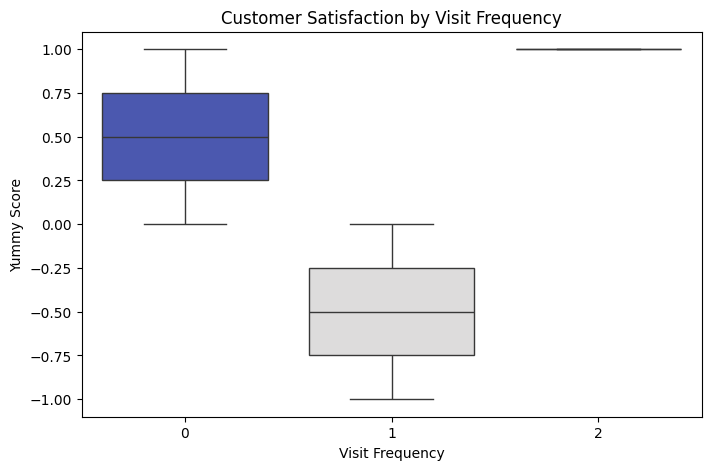

In [ ]:
# --- Customer Segmentation Analysis ---
# Grouping by visit frequency and analyzing preferences
segment_analysis = df.groupby("VisitFrequency")[cols_to_encode].mean().reset_index()

# Fixed visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x="VisitFrequency", y="yummy", data=df, hue="VisitFrequency", dodge=False, legend=False, palette="coolwarm")

plt.title("Customer Satisfaction by Visit Frequency")
plt.xlabel("Visit Frequency")
plt.ylabel("Yummy Score")
plt.show()

In [ ]:
data1['VisitFrequency'] = LabelEncoder().fit_transform(data1['VisitFrequency'])
visit = data1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [ ]:
data1['Like'] = LabelEncoder().fit_transform(data1['Like'])
Like = data1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.888514
1,1,4.957717
2,2,3.694656
3,3,3.915009


In [ ]:
data1['Gender'] = LabelEncoder().fit_transform(data1['Gender'])
Gender = data1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


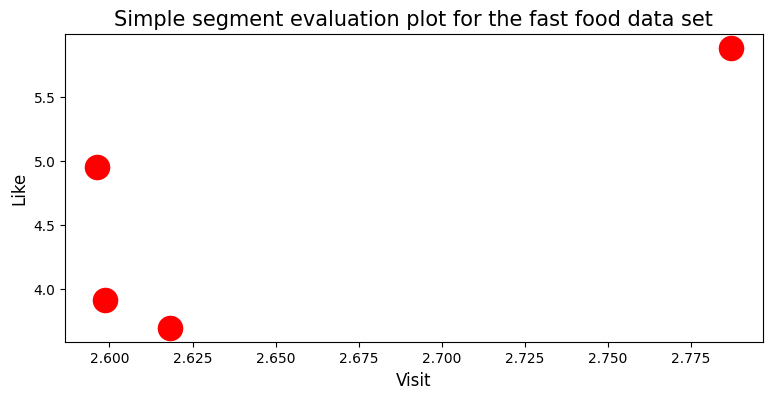

In [ ]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()